In [ ]:
Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

[ ]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


Estimated coefficients:
b_0 = 22.84898230806577            
b_1 = 3.4103229995131317


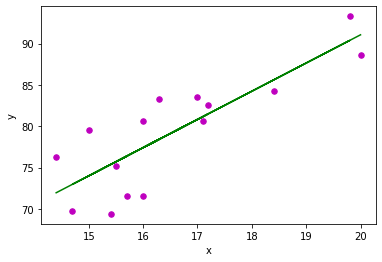

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,color = 'm',marker = 'o',s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x =np.array([20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
        15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0, 14.4])
    y =np.array ([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
        71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
        76.3])
 
    
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
   
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.array(df["Chirps/Second"]).reshape(-1, 1)
y = np.array(df['Ground Temperature']).reshape(-1, 1)
regr = LinearRegression()
  
regr.fit(x,y)
print(regr.score(x,y))

0.6922946529147003


In [ ]:
x = np.array(df["Chirps/Second"][:7]).reshape(-1, 1)
y = np.array(df['Ground Temperature'][:7]).reshape(-1, 1)
regr = LinearRegression()
  
regr.fit(x,y)
print(regr.score(x,y))

0.9289860552895822


In [ ]:
import numpy as np
from scipy import interpolate

x = np.array(df['Ground Temperature'])
y = np.array(df["Chirps/Second"])
f = interpolate.interp1d(x, y, fill_value = "extrapolate")
print(f(95))


19.727659574468085


In [ ]:
import numpy as np
from scipy import interpolate
import numpy as np
from scipy import interpolate

x = np.array(df["Chirps/Second"])
y = np.array(df['Ground Temperature'])
f = interpolate.interp1d(x, y, fill_value = "extrapolate")
print(f(18))


83.73333333333333


In [ ]:
Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
[ ]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


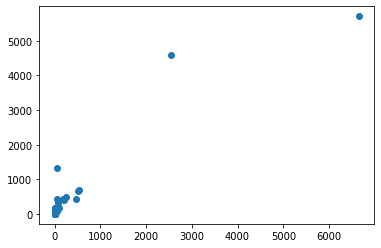

In [ ]:
df2 = df[:][:50]
plt.scatter(x = "Brain", y = "Body",data =  df2)


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = df["Body"]
y = df["Brain"]
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print("R", R)
print(R**2)


Regression Line:  y = -56.85554542859643 + 0.903β
R 0.9341638423233543
0.8726620843043327


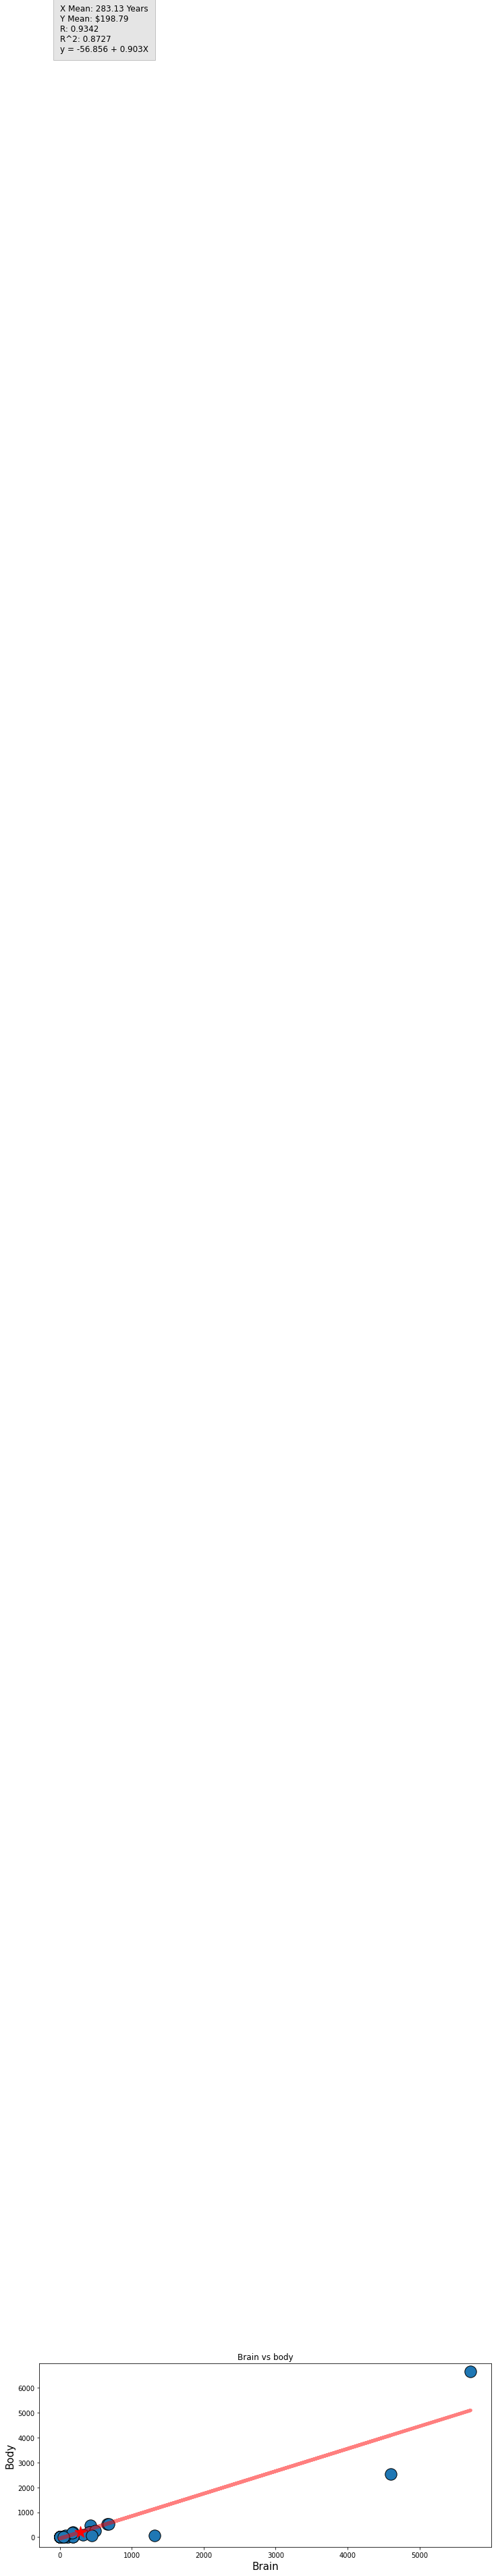

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), round(y.mean(), 2), round(R, 4), round(R**2, 4),round(B0, 3),round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Brain vs body')
plt.xlabel('Brain', fontsize=15)
plt.ylabel('Body', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') 